In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
#https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
df=pd.read_csv('pima_diabetes.csv')
#df=df.drop(['glucose_concentration'],axis=1)
print(df.columns)

Index(['times_pregnant', 'glucose_concentration', 'diastolic_pressure',
       'tricep_skin_thickness', 'insulin', 'bmi', 'diabetes_pf', 'age',
       'target'],
      dtype='object')


<AxesSubplot:>

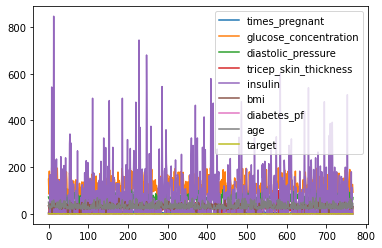

In [4]:
df.plot()

C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


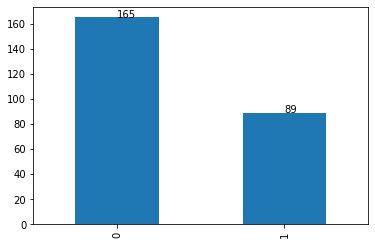

Logistic Regression Accuracy 1.0


In [5]:
NUMERIC=[item for item in df.select_dtypes([np.number]).columns ]
X=df[NUMERIC]
#y=pd.factorize(df['BMI_class'])[0]
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, stratify = y, random_state = 42)

lr=LogisticRegression(C=50)

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

diabetes=y_pred[y_pred==0] 
no_diabetes=y_pred[y_pred==1]

buffer=pd.Series(y_pred)
buffer.value_counts().plot(kind='bar')
plt.annotate(str(len(diabetes)), xy=(0,len(diabetes)))
plt.annotate(str(len(no_diabetes)), xy=(1,len(no_diabetes)))
plt.show()

print("Logistic Regression Accuracy", accuracy_score(y_test,y_pred))



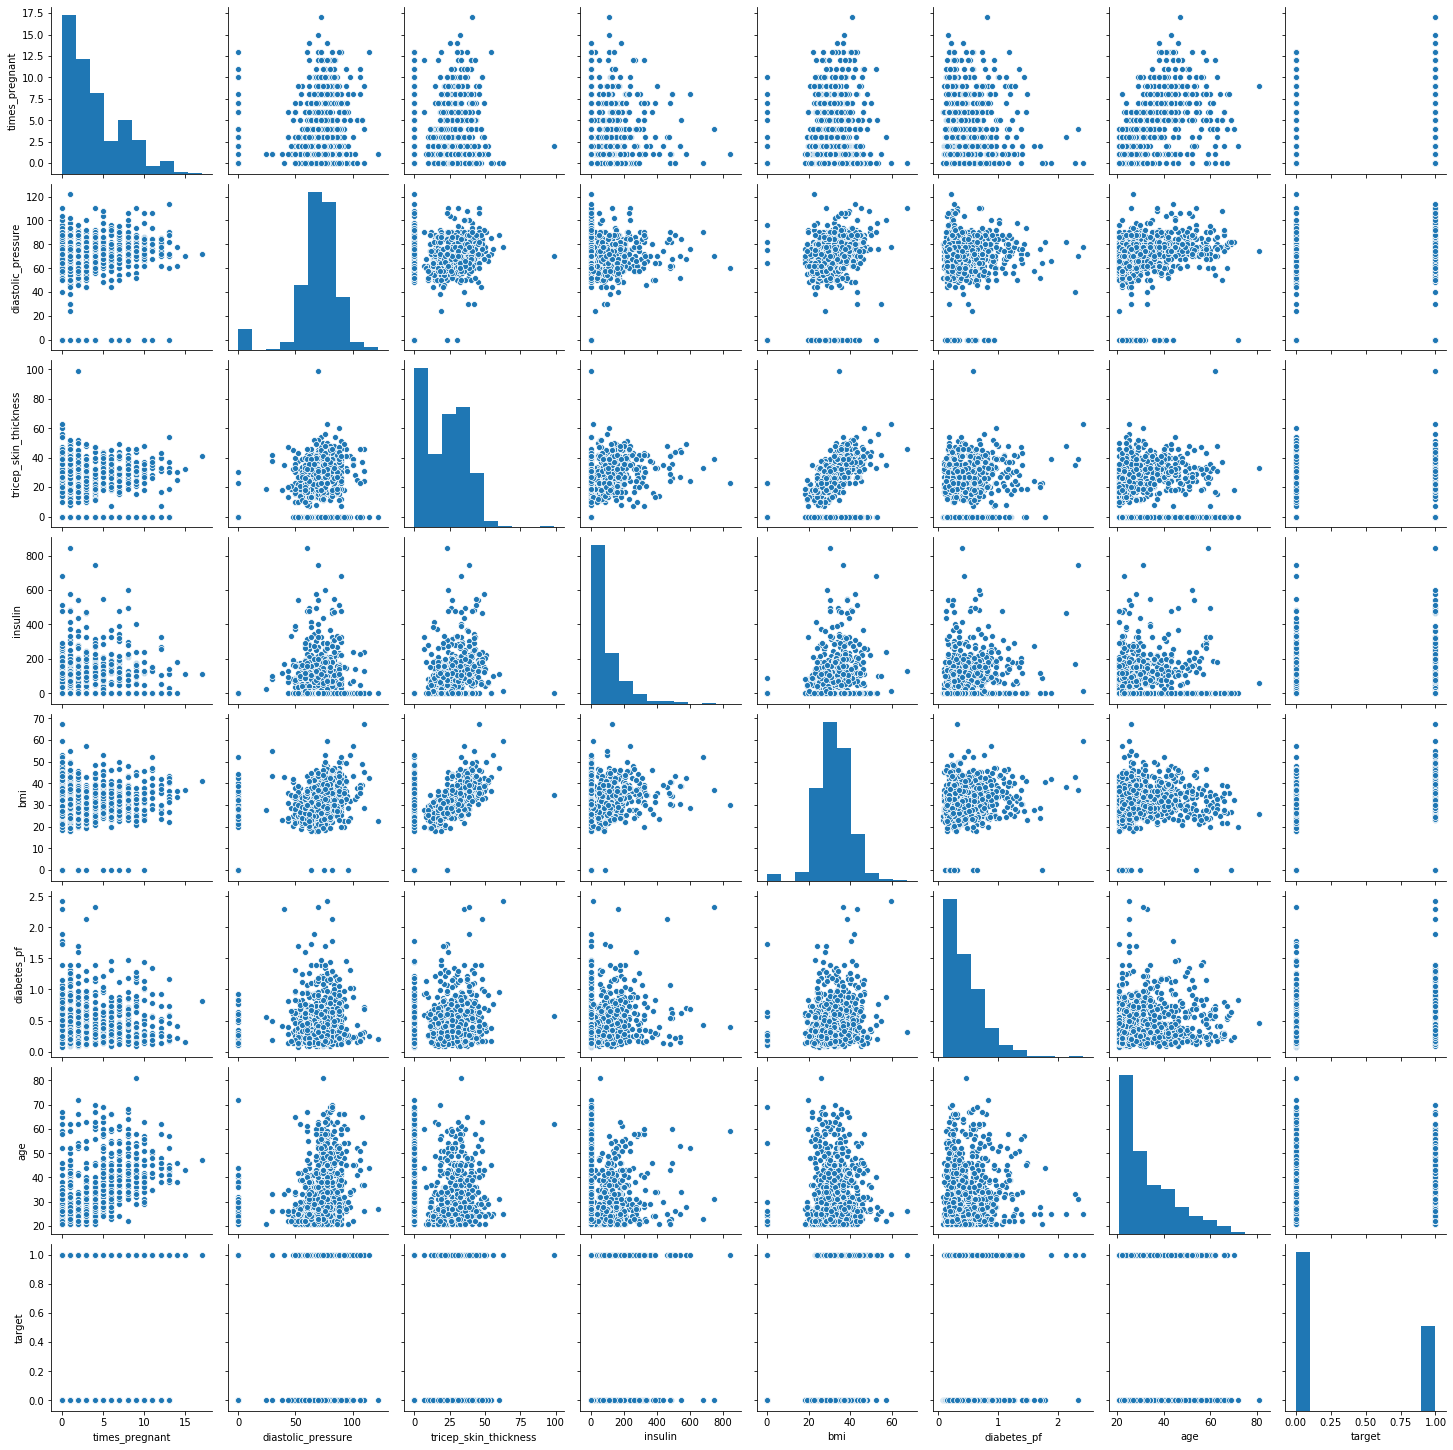

In [57]:
sns.pairplot(df)

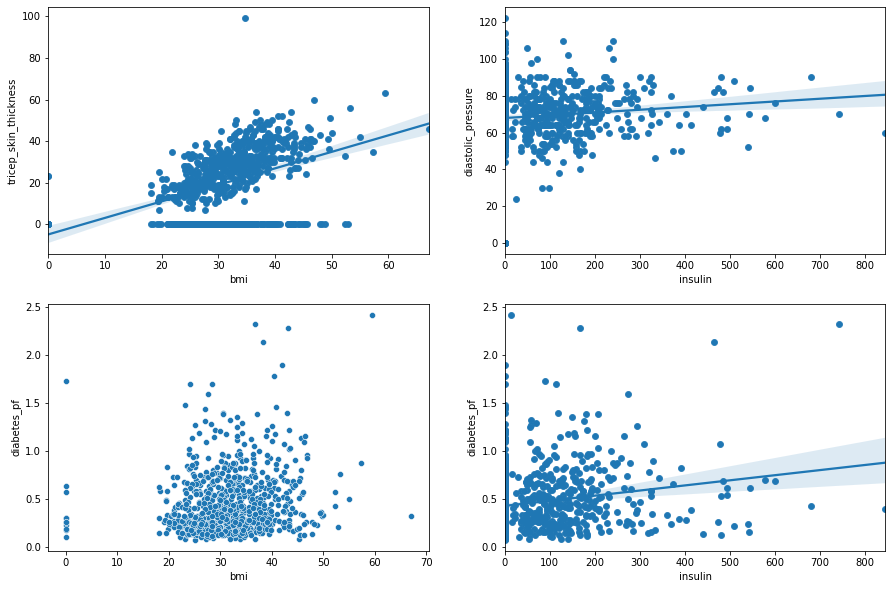

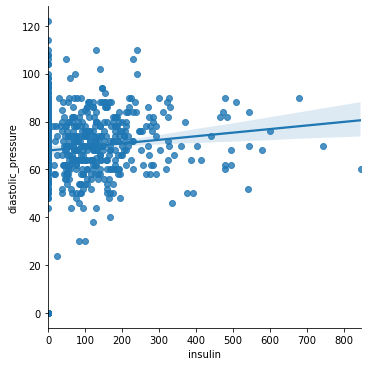

In [16]:
#times_pregnant', 'glucose_concentration', 'diastolic_pressure',
#       'tricep_skin_thickness', 'insulin', 'bmi', 'diabetes_pf', 'age',
#       'target'
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

sns.scatterplot(x='bmi',y='tricep_skin_thickness',data=df,ax=axes[0][0])       
sns.regplot(x='bmi',y='tricep_skin_thickness', data=df,ax=axes[0][0])
sns.scatterplot(x='insulin',y='diastolic_pressure',data=df,ax=axes[0][1])       
sns.regplot(x='insulin',y='diastolic_pressure', data=df,ax=axes[0][1])

sns.scatterplot(x='bmi',y='diabetes_pf',data=df,ax=axes[1][0]) 
sns.scatterplot(x='insulin',y='diabetes_pf',data=df,ax=axes[1][1]) 
sns.regplot(x='insulin',y='diabetes_pf', data=df,ax=axes[1][1])
plt.show()

sns.lmplot(x='insulin',y='diastolic_pressure', data=df)
plt.show()

In [59]:
rfe=RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)

scaler = StandardScaler()
X_train_std= scaler.fit_transform(X_train)

rfe.fit(X_train_std, y_train)

print(X.columns[rfe.support_])

print(dict(zip(X.columns,rfe.ranking_)))


Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['bmi', 'target'], dtype='object')
{'times_pregnant': 2, 'diastolic_pressure': 7, 'tricep_skin_thickness': 6, 'insulin': 4, 'bmi': 1, 'diabetes_pf': 5, 'age': 3, 'target': 1}


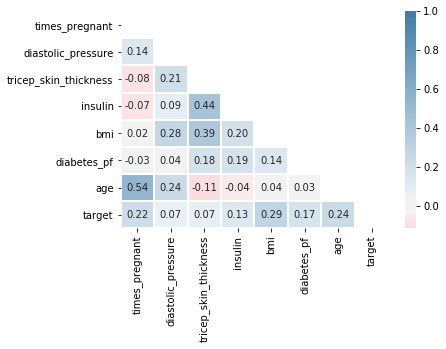

In [60]:
cmap=sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

corr= df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(df.corr(), center=0, cmap=cmap, linewidths=1,
annot=True, fmt=".2f",mask=mask)


In [73]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("Random Forest Accuracy", accuracy_score(y_test,y_pred))


Random Forest Accuracy 1.0


Diabetes pedigree function tells you the liklihood of diabetes based on the history of the family


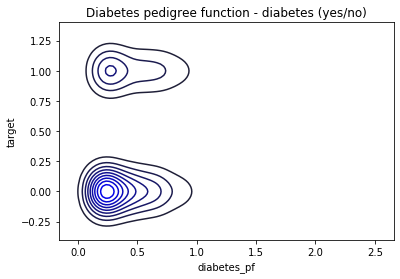

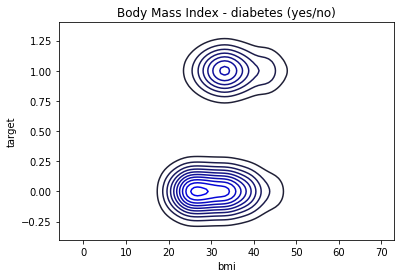

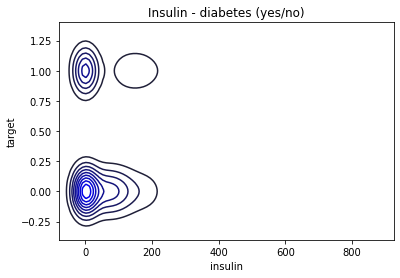

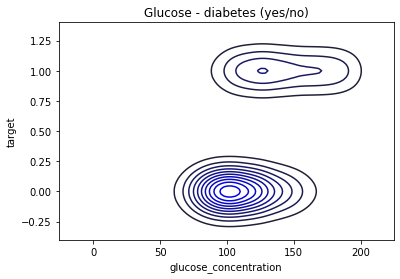

In [85]:
print('Diabetes pedigree function tells you the liklihood of diabetes based on the history of the family')

#f, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 10))
sns.kdeplot(df['diabetes_pf'], df['target'], color="b")
plt.title('Diabetes pedigree function - diabetes (yes/no)')
plt.show()
sns.kdeplot(df['bmi'], df['target'], color="b")
plt.title('Body Mass Index - diabetes (yes/no)')
plt.show()
sns.kdeplot(df['insulin'], df['target'], color="b")
plt.title('Insulin - diabetes (yes/no)')
plt.show()
sns.kdeplot(df['glucose_concentration'], df['target'], color="b")
plt.title('Glucose - diabetes (yes/no)')
plt.show()
